In [1]:
import pandas as pd
import pymc3 as pm
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn-whitegrid')
plt.rcParams.update({'figure.figsize': [8, 5], 'figure.dpi': 95})

In [2]:
howell1 = pd.read_csv('../data/Howell1.csv', sep=';')
howell1.head()

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041915,41.0,1
4,145.415,41.276872,51.0,0


**H1** The weights listed below were recorded in the `!Kung` census, but heights were not recorded for these individuals. Provide predicted heights and 89% intervals (either HPDI or PI) for each of these individuals. That is, fill in the table below, using model-based predictions.

Individual,  weight,  expected height,  89% interval 

weight:
``` 
  46.95,
  43.72,
  64.78,
  32.59,
  54.63
```

In [3]:
weight_missing = pd.Series([46.95, 43.72, 64.78, 32.59, 54.63], name='weight_missing')

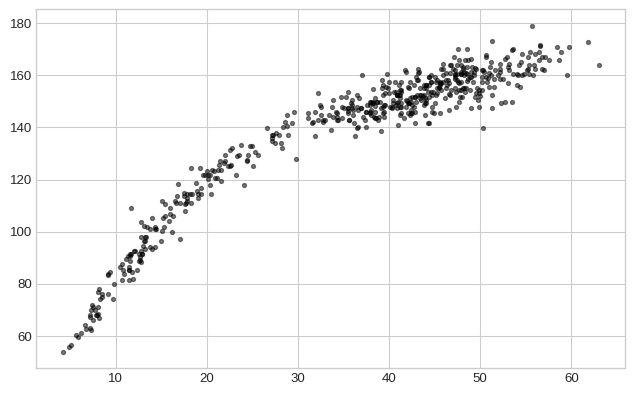

In [4]:
plt.scatter(howell1.weight, howell1.height,
            color='k', alpha=.5, label='observed', marker='.')
None

In [5]:
with pm.Model() as m1:
    alpha = pm.Normal('alpha', 50, 20)
    beta = pm.Normal('beta', 2, 2)

    def get_height(weight):
        return alpha + beta * weight

    height = pm.Deterministic('height', get_height(howell1.weight.values))

    sigma = pm.HalfCauchy('sigma', 5)

    pm.Normal('obs', height, sigma, observed=howell1.height.values)
    
    pm.Deterministic('height_missing', get_height(weight_missing.values))

    m1.trace = pm.sample(5000, tune=10000, chains=2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [sigma, beta, alpha]


Sampling 2 chains for 10_000 tune and 5_000 draw iterations (20_000 + 10_000 draws total) took 16 seconds.


In [6]:
pm.summary(m1.trace, var_names=['alpha', 'beta', 'sigma'])

/home/petrushev/etc/jupenv/lib/python3.8/site-packages/arviz/data/io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
alpha,75.374,1.077,73.374,77.403,0.018,0.013,3500.0,3500.0,3493.0,3921.0,1.0
beta,1.766,0.028,1.716,1.820,0.000,0.000,3410.0,3410.0,3406.0,4319.0,1.0
sigma,9.375,0.291,8.853,9.940,0.004,0.003,4917.0,4903.0,4924.0,4782.0,1.0


In [7]:
(pm.summary(m1.trace, var_names=['height_missing'], hdi_prob=0.89)
 .reset_index()
 [['mean', 'hdi_5.5%', 'hdi_94.5%']]
 .join(weight_missing.to_frame()))

/home/petrushev/etc/jupenv/lib/python3.8/site-packages/arviz/data/io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,hdi_5.5%,hdi_94.5%,weight_missing
0,158.283,157.530,159.173,46.95
1,152.579,151.830,153.318,43.72
2,189.769,188.380,191.285,64.78
3,132.925,132.251,133.582,32.59
4,171.845,170.771,172.901,54.63


**H2**. Select out all the rows in the Howell1 data with ages below 18 years of age. If you do it right,
you should end up with a new data frame with 192 rows in it.

In [8]:
howell1_18 = howell1[howell1.age < 18]
howell1_18 = howell1_18.reset_index(drop=True)
howell1_18.shape[0]

192

(a) Fit a linear regression to these data, using map. Present and interpret the estimates. For every
10 units of increase in weight, how much taller does the model predict a child gets?

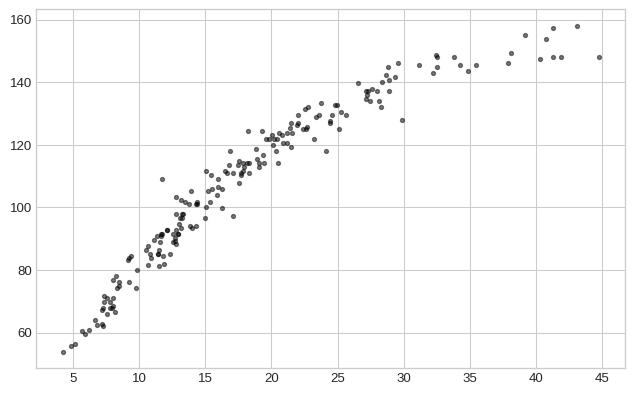

In [9]:
plt.scatter(howell1_18.weight, howell1_18.height,
            color='k', alpha=.5, label='observed', marker='.')
None

In [10]:
with pm.Model() as m2:
    alpha = pm.Normal('alpha', 50, 20)
    beta = pm.Normal('beta', 2, 2)

    def get_height(weight):
        return alpha + beta * weight

    height = pm.Deterministic('height', get_height(howell1_18.weight.values))

    sigma = pm.HalfCauchy('sigma', 5)

    pm.Normal('obs', height, sigma, observed=howell1_18.height.values)
    
    pm.Deterministic('height_missing', get_height(weight_missing.values))

    m2.trace = pm.sample(5000, tune=10000, chains=2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [sigma, beta, alpha]


Sampling 2 chains for 10_000 tune and 5_000 draw iterations (20_000 + 10_000 draws total) took 13 seconds.


In [11]:
pm.summary(m2.trace, var_names=['alpha', 'beta'])

/home/petrushev/etc/jupenv/lib/python3.8/site-packages/arviz/data/io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
alpha,58.209,1.443,55.564,60.926,0.023,0.016,4015.0,4012.0,4017.0,4270.0,1.0
beta,2.721,0.071,2.587,2.850,0.001,0.001,4005.0,4005.0,4005.0,4264.0,1.0


(b) Plot the raw data, with height on the vertical axis and weight on the horizontal axis. Superimpose the MAP regression line and 89% HPDI for the mean. Also superimpose the 89% HPDI for
predicted heights.

/home/petrushev/etc/jupenv/lib/python3.8/site-packages/arviz/data/io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


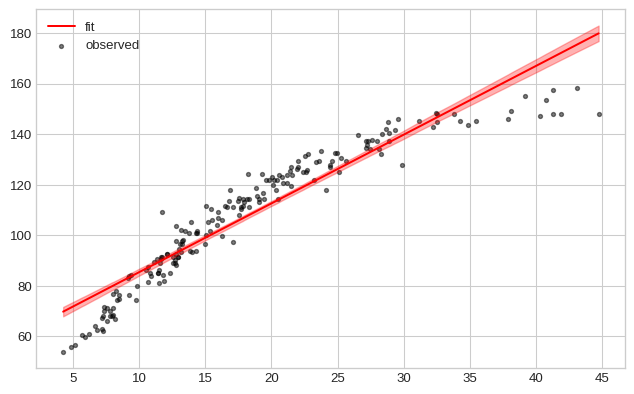

In [12]:
tmp = pm.summary(m2.trace, var_names=['height'], hdi_prob=0.89)
tmp = tmp.reset_index()[['mean', 'hdi_5.5%', 'hdi_94.5%']].join(howell1_18[['weight']])
tmp = tmp.sort_values('weight')

ax = plt.gca()
ax.scatter(howell1_18.weight, howell1_18.height,
           color='k', alpha=.5, label='observed', marker='.')
ax.plot(tmp.weight, tmp['mean'], color='r', label='fit')
ax.fill_between(tmp.weight, tmp['hdi_5.5%'], tmp['hdi_94.5%'],
                color='r', alpha=.3)

ax.legend()
None

(c) What aspects of the model fit concern you? Describe the kinds of assumptions you would
change, if any, to improve the model. You don’t have to write any new code. Just explain what the
model appears to be doing a bad job of, and what you hypothesize would be a better model.

piecewise linear model with **switchpoint**
 
(TODO)

**H3**. Suppose a colleague of yours, who works on allometry, glances at the practice problems just
above. Your colleague exclaims, “That’s silly. Everyone knows that it’s only the logarithm of body
weight that scales with height!” Let’s take your colleague’s advice and see what happens.

(a) Model the relationship between height (cm) and the natural logarithm of weight (log-kg). Use
the entire `Howell1` data frame, all 544 rows, adults and non-adults. Fit this model, using quadratic
approximation:

```
hi ∼ Normal(μi, σ)

μi = α + β log(wi)

α ∼ Normal(178, 100)

β ∼ Normal(0, 100)

σ ∼ Uniform(0, 50)
```

where hi is the height of individual i and wi is the weight (in kg) of individual i. Can you interpret the resulting estimates?

In [13]:
with pm.Model() as m3:
    alpha = pm.Normal('alpha', mu=178, sd=100)
    beta = pm.Normal('beta', mu=0, sd=100)

    height = pm.Deterministic(
        'height',
        alpha + beta * np.log(howell1.weight.values)
    )

    sigma = pm.Uniform('sigma', 0, 50)
    height_obs = pm.Normal('height_obs', mu=height, sd=sigma, observed=howell1.height.values)

    m3.trace = pm.sample(5000, tune=3000, chains=2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [sigma, beta, alpha]


Sampling 2 chains for 3_000 tune and 5_000 draw iterations (6_000 + 10_000 draws total) took 15 seconds.
The acceptance probability does not match the target. It is 0.8856085471650955, but should be close to 0.8. Try to increase the number of tuning steps.


In [14]:
pm.summary(m3.trace, var_names=['alpha', 'beta', 'sigma'])

/home/petrushev/etc/jupenv/lib/python3.8/site-packages/arviz/data/io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
alpha,-23.764,1.362,-26.260,-21.136,0.027,0.019,2628.0,2628.0,2632.0,3338.0,1.0
beta,47.068,0.390,46.304,47.784,0.008,0.005,2661.0,2661.0,2667.0,3193.0,1.0
sigma,5.162,0.158,4.865,5.453,0.002,0.002,5342.0,5324.0,5404.0,4662.0,1.0


(b) Begin with this plot:
```
plot( height ~ weight , data=Howell1 , col=col.alpha(rangi2,0.4) )
```
Then use samples from the quadratic approximate posterior of the model in (a) to superimpose on
the plot: (1) the predicted mean height as a function of weight, (2) the 97% HPDI for the mean, and
(3) the 97% HPDI for predicted heights.


In [15]:
with m3:
    m3.ppc = pm.sample_posterior_predictive(m3.trace, vars=[height_obs], samples=10000)

In [16]:
height_mean = pd.DataFrame(pm.hpd(m3.trace['height'], hdi_prob=0.97))
height_mean.columns = ['hdi_1.5%', 'hdi_98.5%']
height_mean = height_mean.join(howell1[['weight']])
height_mean = height_mean.sort_values('weight')

/home/petrushev/etc/jupenv/lib/python3.8/site-packages/arviz/stats/stats.py:337: UserWarning: hpd will be deprecated Please replace hdi
  warnings.warn(
/home/petrushev/etc/jupenv/lib/python3.8/site-packages/arviz/stats/stats.py:484: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  warnings.warn(


In [17]:
height_ppc = pd.DataFrame(pm.hpd(m3.ppc['height_obs'], hdi_prob=0.97))
height_ppc.columns = ['hdi_1.5%', 'hdi_98.5%']
height_ppc = height_ppc.join(howell1[['weight']])
height_ppc = height_ppc.sort_values('weight')

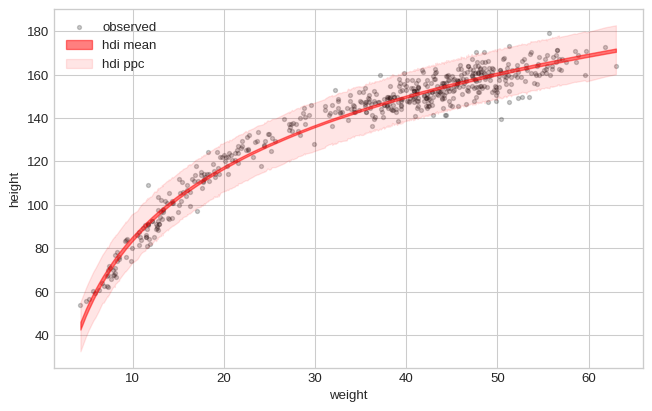

In [18]:
ax = plt.gca()
ax.scatter(howell1.weight, howell1.height,
           color='k', alpha=.2, label='observed', marker='.')
ax.fill_between(height_mean['weight'], height_mean['hdi_1.5%'], height_mean['hdi_98.5%'],
                color='r', alpha=.5, label='hdi mean')
ax.fill_between(height_ppc.weight, height_ppc['hdi_1.5%'], height_ppc['hdi_98.5%'],
                color='r', alpha=.1, label='hdi ppc')

ax.set(xlabel='weight', ylabel='height')
ax.legend()
None